# Graph II

In [7]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
from IPython.display import display, Image

In [2]:
class AgentState(TypedDict):
    name: str
    values: List[int]
    result: str

In [11]:
# Create a node for the state graph
def process_values(state: AgentState) -> AgentState:
    """Process the input values and update the state with the result."""

    print(state)

    # Calculate the sum of the values and create a greeting message
    state['result'] = f"Hi {state['name']}, the sum is {sum(state['values'])}"

    print(state)
    
    # Return the updated state
    return state

In [13]:
graph = StateGraph(AgentState)
graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

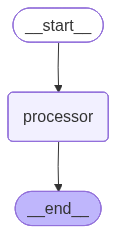

In [8]:
# visualize the graph structure using IPython display
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
init_state: AgentState = {
    "name": "Alice",
    "values": [10, 20, 30],
}

final_state: AgentState = app.invoke(init_state)
final_state['result']

{'name': 'Alice', 'values': [10, 20, 30]}
{'name': 'Alice', 'values': [10, 20, 30], 'result': 'Hi Alice, the sum is 60'}


'Hi Alice, the sum is 60'